SUBMISSION INSTRUCTIONS

It is recommended that you make a copy of this colab file and then solve the assignment and upload your final notebook on github.

Before uploading your downloaded notebook, RENAME the file as rollno_name.ipynb

Submission Deadline : 18/12/2025 Thursday EOD i.e before 11:59 PM

The deadline is strict and will not be extended, Late submissions are not allowed

Note that you have to upload your solution on the github page of the project Vision Transformer and under Week1

when submitting your pull request on the submission repo keep title as ViT_name_rollno_assgn2

Github Submission repo - https://github.com/electricalengineersiitk/Winter-projects-25-26/tree/main/Vision%20transformer/Week1


#NOTE:
Do not use any pre-built functions from any new libraries apart from numpy, matplot-lib, pandas except for importing datasets.

#### Importing Libraries

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import random




# Importing Datasets

Import the MNIST dataset and create X_train, Y_train, and X_test, Y_test.

After importing the dataset you can resize it such that you are dealing with only 1000 images of each number.



In [40]:
from tensorflow.keras.datasets import mnist
import numpy as np

# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Take only 1000 images per class from training data
X_list = []
y_list = []

for digit in range(10):
    idx = np.where(y_train == digit)[0][:1000]
    X_list.append(X_train[idx])
    y_list.append(y_train[idx])

X = np.concatenate(X_list, axis=0)
y = np.concatenate(y_list, axis=0)

# Flatten images (28x28 -> 784)
X = X.reshape(X.shape[0], -1).T

# Normalize
X = X / 255.0

# One-hot encode labels
Y = np.zeros((10, y.shape[0]))
Y[y, np.arange(y.shape[0])] = 1

y = Y

# Train-test split (80% train, 20% test)
m = X.shape[1]
split = int(0.8 * m)

X_train = X[:, :split]
Y_train = y[:, :split]

X_test = X[:, split:]
Y_test = y[:, split:]



# Model


## Initialize parameters Randomly
$ W_1 = np.random.randn(n_1, n_0) $

$ b_1 = np.zeros((n_1, 1))$

$ W_2 = np.random.randn(n_2, n_1) $

$ b_2 = np.zeros((n_2, 1))$


## Repeat Below Steps for many times :


## Forward Propagation

$ Z_1 = W_1 * X + B_1 $

$ A_1 = f ( Z_1 ) $  

$ Z_2 = W2 * A_1 + B_2 $

$ A_2 = Softmax( Z_2 ) $

## Softmax

$ a_i = \frac{e^{z_i}}{\sum_{i=k}^ne^{z_k}}$


## Cost Function

$Loss = - \sum_{i=k}^{n}[ y_k*log(a_k) ]$

$Cost = - \frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{n}[ y_k*log(a_k) ]$



## Backward Propagation
$dZ_2 = ( A_2 - Y )$

$ dW_2 = \frac{1}{m}. dZ_2 . A_1^T$

$ dB_2 = \frac{1}{m}.sum(dZ_2, 1)$



$dZ_1 = W_2^T . dZ_2 * f_1^|(Z_1) $

$dW_1 = \frac{1}{m}.dZ_1.X^T$

$dB_1 = \frac{1}{m}.sum(dZ_1, 1)$


## Updating Parameters

$ W_2 = W_2 -  \alpha * \frac{\partial Cost }{\partial W_2}$

$ B_2 = B_2 -  \alpha * \frac{\partial Cost }{\partial B_2}$

$ W_1 = W_1 -  \alpha * \frac{\partial Cost }{\partial W_1}$

$ B_1 = B_1 -  \alpha * \frac{\partial Cost }{\partial B_1}$


# Activation Functions

***Now, its your time to implement !***

Complete the below functions for Activations.

In [8]:
def tanh(x):
   return np.tanh(x)




In [9]:
def relu(x):
   return np.maximum(0, x)

In [33]:
def softmax(z):
    z = z - np.max(z, axis=0, keepdims=True)
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)



The function *derivative_tanh* must return the derivative of tanh.
The function *derivative_relu* must return the derivative of ReLU


derivative of tanh is given by 1 - tanh^2(x).


so, derivative_tanh(x):

return 1 - np.power(np.tanh(x), 2)

In [11]:
def derivative_tanh(x):
   return 1 - np.power(np.tanh(x), 2)


def derivative_relu(x):
   return (x > 0).astype(float)


# Initialize Parameters

We need to initialize the **W** parameters randomly, and **B** with zeros

- np.random.randn(a, b) return a numpy array of shape(a, b) with small random values
- For making the values small, we multiply 0.01
- np.zeros(a, b) return a numpy array of shape(a, b) with zeros

### Why need small weights W?
If we initialize weights will large values, then Z = W * X + B, will be large. For functions like tanh and sigmoid, the slope becomes very less for large Z value, thus learning can be very slow.

#### We have an increase in the cost function at the beginning while training the model with ReLU activation function.
It is because our weights were still very large and it was creating problem for training our model.

Multiply weights with 0.001 instead of 0.01, and you will see that the graph becomes normal, with a smooth decrease in cost value.

There are many weight initialization techniques available as well, to solve other such problems.

Now, We need to return a dictionary containing all the parameters.

More about np.random.randn here : https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html

In [23]:
def initialize_parameters(n_x, n_h, n_y):

    w1 = 0.01 * np.random.randn(n_h, n_x)
    b1 = np.zeros((n_h, 1))
    w2 = 0.01 * np.random.randn(n_y, n_h)
    b2 = np.zeros((n_y, 1))

    parameters = {
        "w1": w1,
        "b1": b1,
        "w2": w2,
        "b2": b2
    }

    return parameters


# Forward Propagation

We need to impletement the following equation for forward propagation :

$ Z_1 = W_1 * X + B_1 $

$ A_1 = f ( Z_1 ) $  

$ Z_2 = W2 * A_1 + B_2 $

$ A_2 = Softmax( Z_2 ) $

For f(x), you can use either tanh or ReLU activation function.

But also use the same for Backpropagation as well

In [24]:
def forward_prop(X, parameters):

    w1 = parameters["w1"]
    b1 = parameters["b1"]
    w2 = parameters["w2"]
    b2 = parameters["b2"]

    z1 = np.dot(w1, X) + b1
    a1 = tanh(z1)

    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)

    forward_cache = {
        "z1": z1,
        "a1": a1,
        "z2": z2,
        "a2": a2
    }

    return forward_cache


# Cost Function

$Loss = - \sum_{k=1}^{n}[ y_k*log(a_k) ]$ .. *for 1 observation*

$Cost = - \frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{n}[ y_k*log(a_k) ]$  .. *for all m observations*

You need to return the cost in the below function

You can use np.sum()
- np.sum(A, axis = 1, keepdims = True) return the column-wise sum for a matrix A
- np.sum(A, axis = 0, keepdims = True) returns the row-wise sum for a matrix A
- np.sum(A) returns the summation of all the elements of A

*keepdims = True keeps the dimenstion in place. In certain cases, the returned sum can be of shape(m,) instead of shape(m, 1).
So, keepdims = True forces it to return the sum in shape(m, 1) instead of shape(m,)*


More about np.sum() here : https://numpy.org/doc/stable/reference/generated/numpy.sum.html

In [25]:
def cost_function(a2, y):

    m = y.shape[1]
    cost = - (1 / m) * np.sum(y * np.log(a2))

    return cost




# Backward Propagation

We need to implement the below equations

$dZ_2 = ( A_2 - Y )$

$ dW_2 = \frac{1}{m}. dZ_2 . A_2^T$

$ dB_2 = \frac{1}{m}.sum(dZ_2, 1)$



$dZ_1 = W_2^T . dZ_2 * f_1^|(Z_1) $

$dW_1 = \frac{1}{m}.dZ_1.A_1^T$

$dB_1 = \frac{1}{m}.sum(dZ_1, 1)$

Helper python functions :
- A.T returns the transpose of matrix A
- np.dot(A, B) returns the matrix multiplication of A and B
- A*B returns the element wise multi-plication for A and B
- np.sum(A, axis = 1, keepdims = True) return the column-wise sum for a matrix A
- np.sum(A, axis = 0, keepdims = True) returns the row-wise sum for a matrix A

In [26]:
def backward_prop(X, y, parameters, forward_cache):

    m = X.shape[1]

    w1 = parameters["w1"]
    b1 = parameters["b1"]
    w2 = parameters["w2"]
    b2 = parameters["b2"]

    a1 = forward_cache["a1"]
    a2 = forward_cache["a2"]

    dz2 = a2 - y
    dw2 = (1 / m) * np.dot(dz2, a1.T)
    db2 = (1 / m) * np.sum(dz2, axis=1, keepdims=True)

    dz1 = np.dot(w2.T, dz2) * derivative_tanh(a1)
    dw1 = (1 / m) * np.dot(dz1, X.T)
    db1 = (1 / m) * np.sum(dz1, axis=1, keepdims=True)

    gradients = {
        "dw1": dw1,
        "db1": db1,
        "dw2": dw2,
        "db2": db2
    }

    return gradients


# Update Parameters

In [27]:
def update_parameters(parameters, gradients, learning_rate):

    w1 = parameters["w1"]
    b1 = parameters["b1"]
    w2 = parameters["w2"]
    b2 = parameters["b2"]

    dw1 = gradients["dw1"]
    db1 = gradients["db1"]
    dw2 = gradients["dw2"]
    db2 = gradients["db2"]

    w1 = w1 - learning_rate * dw1
    b1 = b1 - learning_rate * db1
    w2 = w2 - learning_rate * dw2
    b2 = b2 - learning_rate * db2

    Parameters = {
        "w1": w1,
        "b1": b1,
        "w2": w2,
        "b2": b2
    }

    return Parameters


# Complete Model

Implement the entire Neural Network here

### Instructions :

We need to initialize parameters once, and after that, we will run the following in a loop:
- forward_prop(x, parameters)
- cost_function(a2, y)
- backward_prop(x, y, parameters, forward_cache)
- parameters = update_parameters(parameters, gradients, learning_rate)

### Return :
- parameters, which will be our trained parameters
- cost_list, which contains cost for every iterations.

In [30]:
def model(X, y, n_h, learning_rate, iterations):

    n_x = X.shape[0]
    n_y = y.shape[0]

    cost_list = []

    parameters = initialize_parameters(n_x, n_h, n_y)

    for i in range(iterations):

        forward_cache = forward_prop(X, parameters)
        cost = cost_function(forward_cache["a2"], y)
        gradients = backward_prop(X, y, parameters, forward_cache)
        parameters = update_parameters(parameters, gradients, learning_rate)

        cost_list.append(cost)

        if i % (iterations // 10) == 0:
            print("cost after", i, "iters is", cost)

    return parameters, cost_list





In [31]:
n_h = 64
learning_rate = 0.01
iterations = 1000


cost after 0 iters is 2.3020418388777317
cost after 100 iters is 2.2843500828223027
cost after 200 iters is 2.2526841134343094
cost after 300 iters is 2.187130602027021
cost after 400 iters is 2.063554057245782
cost after 500 iters is 1.874022900980047
cost after 600 iters is 1.6503096940130684
cost after 700 iters is 1.4384337201739954
cost after 800 iters is 1.2616565557463322
cost after 900 iters is 1.1196941647972831


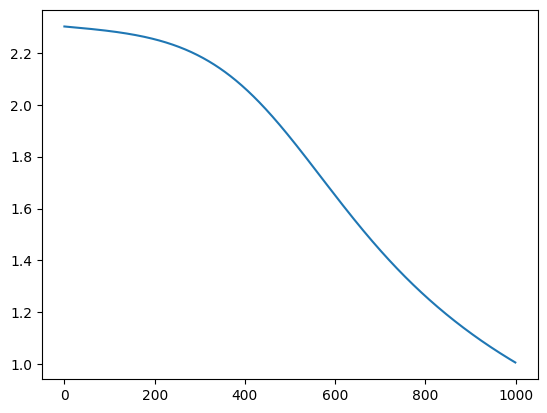

In [36]:
Parameters, cost_list = model(X, y, n_h=n_h, learning_rate=learning_rate, iterations=iterations)

t = np.arange(0, iterations, 1)
plt.plot(t, cost_list)
plt.show()


# Checking Accuracy

Run the below cells to check your model Accuracy

In [42]:
def accuracy(inp, labels, parameters):
    forward_cache = forward_prop(inp, parameters)
    a_out = forward_cache['a2']   # containes propabilities with shape(10, 1)

    a_out = np.argmax(a_out, 0)  # 0 represents row wise

    labels = np.argmax(labels, 0)

    acc = np.mean(a_out == labels)*100

    return acc

In [43]:
print("Accuracy of Train Dataset", accuracy(X_train, Y_train, Parameters), "%")
print("Accuracy of Test Dataset", round(accuracy(X_test, Y_test, Parameters), 2), "%")

Accuracy of Train Dataset 81.5375 %
Accuracy of Test Dataset 62.8 %


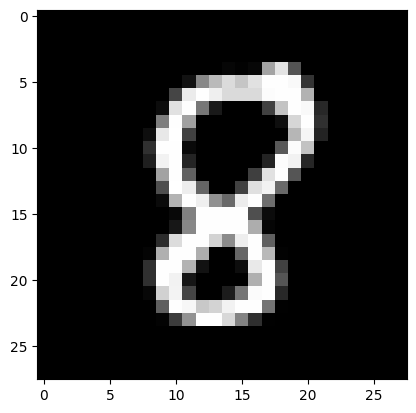

Our model says it is : 8


In [44]:
idx = int(random.randrange(0,X_test.shape[1]))
plt.imshow(X_test[:, idx].reshape((28,28)),cmap='gray')
plt.show()

cache = forward_prop(X_test[:, idx].reshape(X_test[:, idx].shape[0], 1), Parameters)
a_pred = cache['a2']
a_pred = np.argmax(a_pred, 0)

print("Our model says it is :", a_pred[0])